# Chapter 5: Computing forward gravity. (Under development)

GemPy also brings a module to compute the forward gravity response. The idea is to be able to use gravity as a likelihood to validate the geological models within the Bayesian inference. In this chapter we will see how we can compute the gravity response of the sandstone model of chapter 2.

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib inline

# Aux imports
import numpy as np

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


First we just recreate the model as usual.

In [2]:
# Importing the data from csv files and settign extent and resolution
geo_data = gp.create_data([696000,747000,6863000,6950000,-20000, 200],[50, 50, 50],
                         path_o = os.pardir+"/input_data/tut_SandStone/SandStone_Foliations.csv",
                         path_i = os.pardir+"/input_data/tut_SandStone/SandStone_Points.csv")

Setting the series and the formations order:

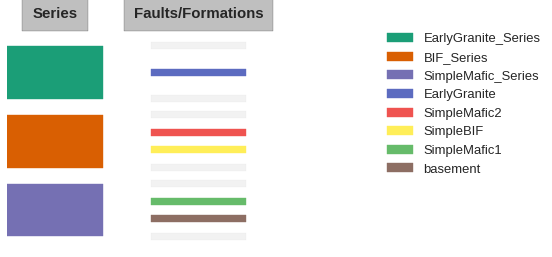

In [3]:
# Assigning series to formations as well as their order (timewise)
gp.set_series(geo_data, {"EarlyGranite_Series": 'EarlyGranite', 
                              "BIF_Series":('SimpleMafic2', 'SimpleBIF'),
                              "SimpleMafic_Series":'SimpleMafic1'}, 
                      order_series = ["EarlyGranite_Series",
                                      "BIF_Series",
                                      "SimpleMafic_Series"],
                      order_formations= ['EarlyGranite', 'SimpleMafic2',
                                         'SimpleBIF', 'SimpleMafic1'],
              verbose=1)

Projection in 2D:

../../gempy/gempy_front.py:789: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  warnings.warn("gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead", FutureWarning)


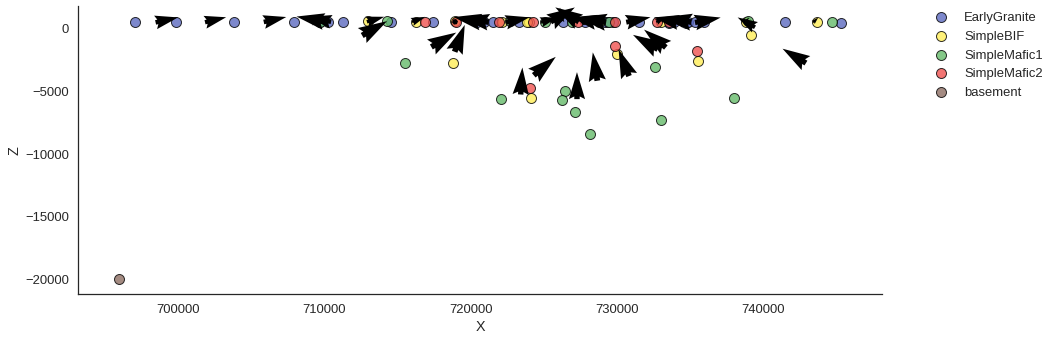

In [4]:
gp.plot_data(geo_data)

## Computing the model

Now as in the previous chapter we just need to create the interpolator object and compute the model.

In [5]:
interp_data = gp.InterpolatorData(geo_data, compile_theano=True)

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  0


In [6]:
lith_block, fault_block = gp.compute_model(interp_data)

The green rectangle represent the area where we want to compute the forward gravity (in this case is due to this is the area where we have measured data). As we can see the original extent of the geological model is not going to be enough (remember that gravity is affected by a cone, not only the mass right below). An advantage of the method is that we can extrapolate as much as needed keeping in mind that the error will increase accordingly.

../../gempy/gempy_front.py:815: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


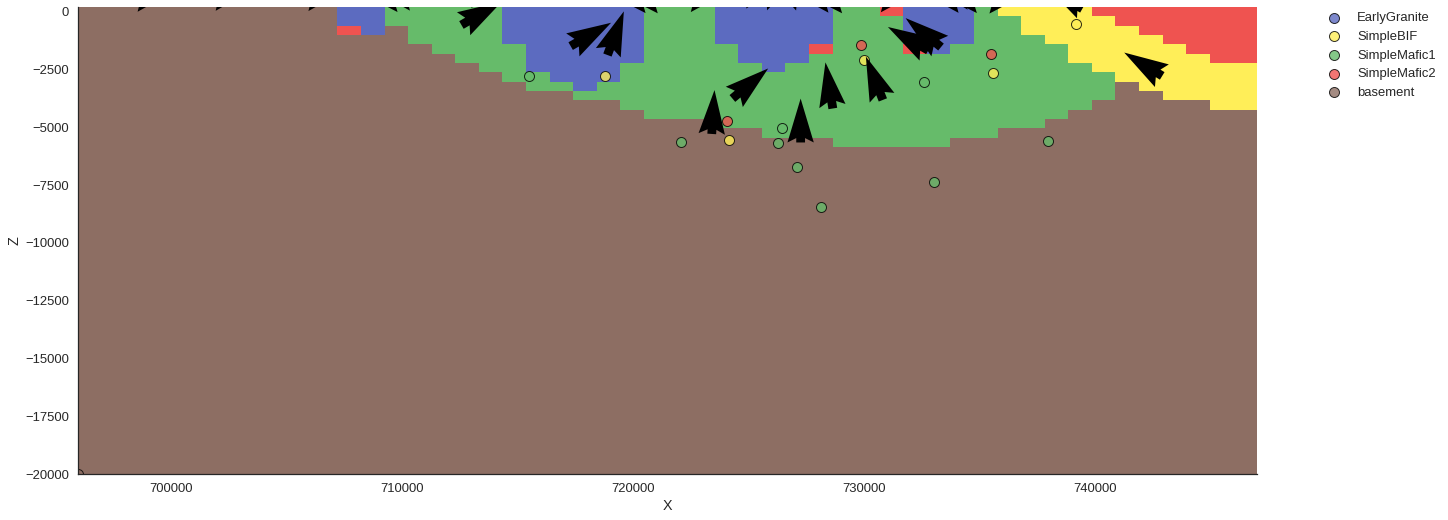

In [7]:
import matplotlib.pyplot as plt

gp.plot_section(geo_data, lith_block[0], 10, plot_data=True, direction='y')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

from matplotlib.patches import Rectangle

currentAxis = plt.gca()

currentAxis.add_patch(Rectangle((7.050000e+05, 6863000),
                                747000 - 7.050000e+05,
                                6925000 - 6863000,
                      alpha=0.3, fill='none', color ='green' ))

In [8]:
ver_s, sim_s = gp.get_surfaces(interp_data,lith_block[1],
                               None,
                               original_scale=True)

In [9]:
gp.plot_surfaces_3D_real_time(interp_data, ver_s, sim_s)

../../gempy/gempy_front.py:886: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


closing vtk


So we recalculate all just adding some padding around the measured data (the green rectangle)

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  0


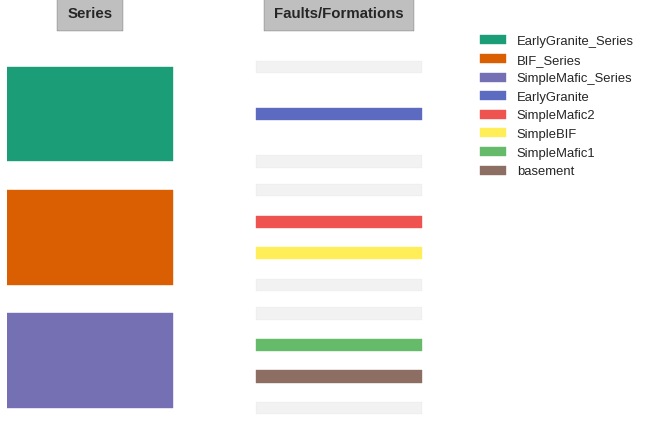

In [10]:
# Importing the data from csv files and settign extent and resolution
geo_data_extended = gp.create_data([696000-10000, 
                                    747000 + 20600, 
                                    6863000 - 20600,6950000 + 20600, 
                                    -20000, 600],
                                   [50, 50, 50],
                         path_o = os.pardir+"/input_data/a_Foliations.csv",
                         path_i = os.pardir+"/input_data/a_Points.csv")


# Assigning series to formations as well as their order (timewise)
gp.set_series(geo_data_extended, {"EarlyGranite_Series": 'EarlyGranite', 
                              "BIF_Series":('SimpleMafic2', 'SimpleBIF'),
                              "SimpleMafic_Series":'SimpleMafic1'}, 
                      order_series = ["EarlyGranite_Series",
                                      "BIF_Series",
                                      "SimpleMafic_Series"],
                      order_formations= ['EarlyGranite', 'SimpleMafic2', 
                                         'SimpleBIF', 'SimpleMafic1'],
              verbose=1)

interp_data_extended = gp.InterpolatorData(geo_data_extended, output='geology',
                                           compile_theano=True)

In [32]:
geo_data_extended.formations.index

Index(['EarlyGranite', 'SimpleMafic2', 'SimpleBIF', 'SimpleMafic1',
       'basement'],
      dtype='object')

In [35]:
geo_data_extended.set_formations(formation_values=[2.61,2.92,3.1,2.92,2.61],
                        formation_order=['EarlyGranite', 'SimpleMafic2',
                                         'SimpleBIF', 'SimpleMafic1',
                                         'basement'])
geo_data_extended.formations

,value,formation_number
EarlyGranite,2.61,1
SimpleMafic2,2.92,2
SimpleBIF,3.10,3
SimpleMafic1,2.92,4
basement,2.61,5


In [21]:
lith_ext, fautl = gp.compute_model(interp_data_extended)

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.955703130666734e-08 / 5.960464477539063e-08
  RuntimeWarning)


../../gempy/gempy_front.py:815: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


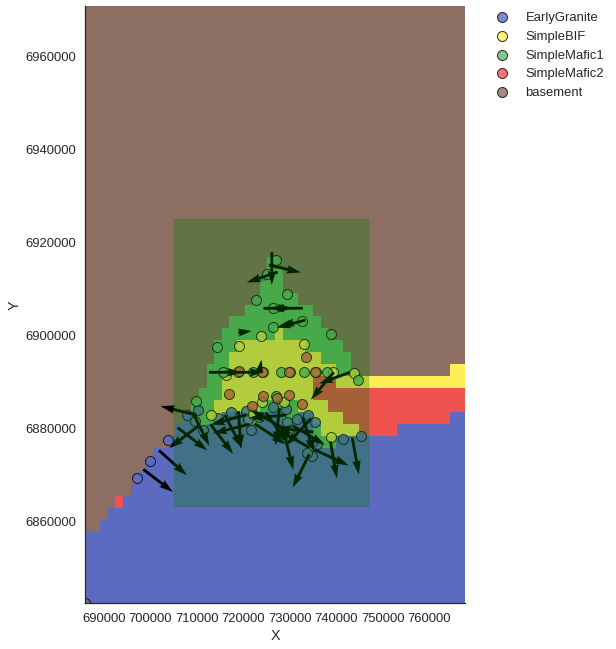

In [22]:
import matplotlib.pyplot as plt

gp.plot_section(geo_data_extended, lith_ext[0], -1, plot_data=True, direction='z')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

from matplotlib.patches import Rectangle

currentAxis = plt.gca()

currentAxis.add_patch(Rectangle((7.050000e+05, 6863000),  747000 - 7.050000e+05,
                                 6925000 - 6863000,
                      alpha=0.3, fill='none', color ='green' ))

In [36]:
interp_data_grav = gp.InterpolatorData(geo_data_extended, output='gravity', compile_theano=True)

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  0


In [37]:
gp.set_geophysics_obj(interp_data_grav,  [7.050000e+05,747000,6863000,6925000,-20000, 200],
                                             [50, 50],)


In [38]:
gp.precomputations_gravity(interp_data_grav, 25)

(array([[  1.72686459e-05,   1.09857421e-05,   4.65121171e-06, ...,
           1.09857421e-05,   4.65121171e-06,  -1.70525309e-06],
        [  1.72686459e-05,   1.09857421e-05,   4.65121171e-06, ...,
           1.09857421e-05,   4.65121171e-06,  -1.70525309e-06],
        [  1.72686459e-05,   1.09857421e-05,   4.65121171e-06, ...,
           1.09857421e-05,   4.65121171e-06,  -1.70525309e-06],
        ..., 
        [  1.72686459e-05,   1.09857421e-05,   4.65121171e-06, ...,
           1.09857421e-05,   4.65121171e-06,  -1.70525309e-06],
        [  1.72686459e-05,   1.09857421e-05,   4.65121171e-06, ...,
           1.09857421e-05,   4.65121171e-06,  -1.70525309e-06],
        [  1.72686459e-05,   1.09857421e-05,   4.65121171e-06, ...,
           1.09857421e-05,   4.65121171e-06,  -1.70525309e-06]]),
 array([False, False, False, ..., False, False, False], dtype=bool))

In [40]:
lith, fault, grav = gp.compute_model(interp_data_grav, 'gravity')

/home/miguel/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.955703130666734e-08 / 5.960464477539063e-08
  RuntimeWarning)


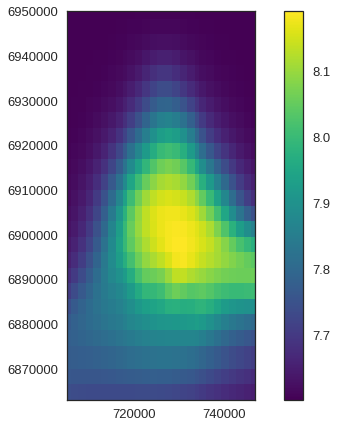

In [41]:
import matplotlib.pyplot as plt

plt.imshow(grav.reshape(50,50), cmap='viridis', origin='lower',
           extent=[7.050000e+05,747000,6863000,6950000] )
plt.colorbar()